# **Text Analysis For Challenge Gold - Project**
# **Presented by Abed Nigo**

```
Discussion of business problems:
    I.   Importing Dataset and Descriptive Statistics Discussion Step
    II.  Data Preprocessing Step
    III. Data Visualization Step
```

## I. Importing Dataset and Descriptive Statistics Discussion

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib as plt
import seaborn as sns
pd.options.display.max_colwidth = 2000

In [2]:
# importing file "data.csv" into data frame (df)
df = pd.read_csv('C:/Users/nigon/Binar Academy/Challenge-Gold/data.csv', encoding='latin-1')

In [3]:
# Displaying top 5 list of the dataset
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0


In [6]:
# Displaying top 5 list of the dataset of 'Tweet' colums
df[['Tweet']].head()

,Tweet
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter"
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'


In [7]:
# Displaying dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [8]:
# Displaying columns of the dataframe
df.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [9]:
# Descriptive statistics of the dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HS,13169.0,0.422280,0.493941,0.0,0.0,0.0,1.0,1.0
Abusive,13169.0,0.382945,0.486123,0.0,0.0,0.0,1.0,1.0
HS_Individual,13169.0,0.271471,0.444735,0.0,0.0,0.0,1.0,1.0
HS_Group,13169.0,0.150809,0.357876,0.0,0.0,0.0,0.0,1.0
HS_Religion,13169.0,0.060217,0.237898,0.0,0.0,0.0,0.0,1.0
HS_Race,13169.0,0.042980,0.202819,0.0,0.0,0.0,0.0,1.0
HS_Physical,13169.0,0.024527,0.154685,0.0,0.0,0.0,0.0,1.0
HS_Gender,13169.0,0.023236,0.150659,0.0,0.0,0.0,0.0,1.0
HS_Other,13169.0,0.284000,0.450954,0.0,0.0,0.0,1.0,1.0
HS_Weak,13169.0,0.256891,0.436935,0.0,0.0,0.0,1.0,1.0


In [12]:
# Return the number of columns and rows of the dataframe
df.shape

(13169, 13)

In [13]:
# Return the null values of dataframe
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [14]:
# Return the number of duplicate values
df.duplicated().sum()

125

In [15]:
# Drop the duplicated values
df = df.drop_duplicates()

In [16]:
# Check if there is any other duplicated values
df.duplicated().sum()

0

In [17]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Importing file new_kamusalay.csv into the dataframe as df_newkamusalay
df_newkamusalay = pd.read_csv('new_kamusalay.csv', encoding='latin-1')

In [19]:
df_newkamusalay

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [20]:
df_newkamusalay.head()

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [21]:
df_newkamusalay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   anakjakartaasikasik       15166 non-null  object
 1   anak jakarta asyik asyik  15166 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB


In [23]:
# return the columns and row of the dataframe
shape_kamusalay = df.shape
print("Number of columns and rows of the dataframe 'df_newkamusalay' (columns, rows):\n{}".format(shape_kamusalay))

Number of columns and rows of the dataframe 'df_newkamusalay' (columns, rows):
(13044, 13)


In [24]:
df_newkamusalay.isna().sum()

anakjakartaasikasik         0
anak jakarta asyik asyik    0
dtype: int64

## **II. Data Preprocessing**
```
This step will use some methods such as Text Cleansing using RegEx, pandas methods, and nltk to tokenize and erase stopwords.
```

In [25]:
# Text Cleansing from columns 'Tweet'
def cleansing(text):
    text = text.lower() # Lower case sentence processing
   
    pola_1 = r'#([^\s]+)' # Removing hastags
    text = re.sub(pola_1, '', text)

    pola_2 = r'@[^\s]+' # Removing mentions
    text = re.sub(pola_2, '', text)
    
    pola_3 = r'(user|retweet|\\t|\\r|url|xd|orang|kalo)' # Removings user, retweet, \t, \r, url, xd, orang, kalo
    text = re.sub(pola_3, '', text)
    
    pola_4 = r'\b\w{1,3}\b' # Removing single character
    text = re.sub(pola_4, '', text)
    
    pola_5 = r'[\,\@\*\_\-\!\:\;\?\'\.\"\)\(\{\}\<\>\+\%\$\^\#\/\`\~\|\&\|]' # Removing punctuations, mathematic and aritmethic operations, etc
    text = re.sub(pola_5, ' ', text)
    
    pola_6 = r'\\[a-z0-9]{1,5}' # Removing emojis
    text = re.sub(pola_6, '', text)
    
    pola_7 = r'[^\x00-\x7f]' # Removing non ASCII words
    text = re.sub(pola_7, '', text)
    
    pola_8 = r'(https|https:)' # Removing url with http or https
    text = re.sub(pola_8, '', text)
    
    pola_9 = r'[\\\]\[]' # Removing special characters of '\',  '[',  ']'
    text = re.sub(pola_9, '', text)
    
    pola_10 = r'\bwk\w+' # Removing "wkwkwk"
    text = re.sub(pola_10, '', text)
 
    pola_11 = r'\d+' #Removing character digits
    text = re.sub(pola_11, '', text)

    pola_12 = r'(\\u[0-9A-Fa-f]+)' # Removing non ASCII characters
    text = re.sub(pola_12, '', text)
    
    pola_13 = r'(\s+|\\n)' # Removing unnecessary spaces
    text = re.sub(pola_13, ' ', text)
    
    # Applying text strip
    text = text.rstrip()
    text = text.lstrip()
    return text

def replaceThreeOrMore(text):
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL) # Removing 3 or more character repetition including newlines
    return pattern.sub(r"\1\1", text)

df['clean_tweet'] = df['Tweet'].apply(cleansing)
df['clean_tweet'] = df['clean_tweet'].apply(replaceThreeOrMore)
df[['clean_tweet']]

,clean_tweet
0,disaat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego
1,siapa yang telat ngasih edan sarap bergaul dengan cigax jifla calis sama siapa licew juga
2,kadang berfikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan ninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak
3,matamu sipit tapi diliat dari mana
4,kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah
...,...
13164,jangan asal ngomong ndasmu congor sekate anjyng
13165,kasur mana enak kunyuk
13166,hati hati bisu bosan huft
13167,yang real mudah terdeteksi yang terkubur suatu saat lebih dahsyat ledakannya itulah sebut revolusi jiwa


In [26]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_tweet
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih edan sarap bergaul dengan cigax jifla calis sama siapa licew juga
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0,kadang berfikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan ninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0,matamu sipit tapi diliat dari mana
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah


### Replace words ind ['clean_tweet'] to match into dictionary from new_kamusalay.csv file

In [28]:
dictionary = dict(zip(df_newkamusalay['anakjakartaasikasik'], df_newkamusalay['anak jakarta asyik asyik']))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([dictionary.get(w, w) for w in x.split()]))

In [29]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_tweet
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0,kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0,matamu sipit tapi dilihat dari mana
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor sekate anjing
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',0,0,0,0,0,0,0,0,0,0,0,0,yang real mudah terdeteksi yang terkubur suatu saat lebih dahsyat ledakannya itulah sebut revolusi jiwa


In [30]:
df[df['clean_tweet'].str.contains("menteri pendidikan dan kebudayaan")]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_tweet
1373,"PRESIDEN DIHINA. Kapolri, Menkumham, Mendikbud, Menhan, Abu Janda, Anshor, Banser. Semua terdiam. Ajaib.'",1,0,0,1,0,0,0,0,1,0,1,0,presiden dihina kepala kepolisian republik indonesia menteri hukum dan hak asasi manusia menteri pendidikan dan kebudayaan menhan janda ansar barisan serba guna semua terdiam ajaib


### Removing Stopwords

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.corpus.stopwords.words('indonesian')

df['tweet_tokenized'] = df['clean_tweet'].apply(lambda x: word_tokenize(x)) # tokenize process

indo_stop_words = stopwords.words("indonesian") # Define stopwords used
more_stopword = ['dengan', 'ia','bahwa','oleh', 'udah', 'gitu', 'pake', 'sampe',
'cuma', 'bikin', 'kayak', 'bilang', 'trus', 'mulu', 'haha', 'wkwk', 'emang', 'bener']
indo_stop_words.extend(more_stopword)

df['clean_tweet_without_stopwords'] = df['tweet_tokenized'].apply(lambda x: ' ' # Creating 'tweet_without_stopwords' column on df dataframe
.join([word for word in x if word not in indo_stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nigon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0,kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0,matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu


In [33]:
# Re-indexing dataframe ['tweet_without_stopwords]
df = df[['Tweet',
 'clean_tweet',
 'tweet_tokenized',
 'clean_tweet_without_stopwords',
 'HS',
 'Abusive',
 'HS_Individual',
 'HS_Group',
 'HS_Religion',
 'HS_Race',
 'HS_Physical',
 'HS_Gender',
 'HS_Other',
 'HS_Weak',
 'HS_Moderate',
 'HS_Strong',
 ]]

In [34]:
df.head()

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu,1,1,0,1,1,0,0,0,0,0,1,0


### Creating labels of 'Abusive' and 'Non Abusive' using 'abusive'.csv

In [35]:
df_abusive = pd.read_csv("abusive.csv")
df_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [36]:
df_abusive['label'] = 'Abusive'

In [37]:
df_abusive

,ABUSIVE,label
0,alay,Abusive
1,ampas,Abusive
2,buta,Abusive
3,keparat,Abusive
4,anjing,Abusive
...,...,...
120,rezim,Abusive
121,sange,Abusive
122,serbet,Abusive
123,sipit,Abusive


## **Feature Step**

In [38]:
dictionary = dict(zip(df_abusive['ABUSIVE'], df_abusive['label']))
df['label'] = df['clean_tweet_without_stopwords'].apply(lambda x: next((dictionary.get(w, 'Non Abusive') for w in re.findall(r'\b%s\b' % '|'.join(dictionary.keys()), x)), 'Non Abusive'))

C:\Users\nigon\AppData\Local\Temp\ipykernel_12832\4043268852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['clean_tweet_without_stopwords'].apply(lambda x: next((dictionary.get(w, 'Non Abusive') for w in re.findall(r'\b%s\b' % '|'.join(dictionary.keys()), x)), 'Non Abusive'))


In [39]:
df = df[['Tweet', 'clean_tweet', 'tweet_tokenized',
       'clean_tweet_without_stopwords', 'label', 'HS', 'Abusive', 'HS_Individual', 'HS_Group',
       'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other',
       'HS_Weak', 'HS_Moderate', 'HS_Strong']]

df

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,Abusive,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu,Abusive,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',jangan asal berbicara ndasmu congor sekate anjing,"[jangan, asal, berbicara, ndasmu, congor, sekate, anjing]",berbicara ndasmu congor sekate anjing,Abusive,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur enak kunyuk,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',hati hati bisu bosan duh,"[hati, hati, bisu, bosan, duh]",hati hati bisu bosan duh,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',yang real mudah terdeteksi yang terkubur suatu saat lebih dahsyat ledakannya itulah sebut revolusi jiwa,"[yang, real, mudah, terdeteksi, yang, terkubur, suatu, saat, lebih, dahsyat, ledakannya, itulah, sebut, revolusi, jiwa]",real mudah terdeteksi terkubur dahsyat ledakannya revolusi jiwa,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df.loc[df['label'].isin(['Abusive'])]

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,Abusive,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu,Abusive,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x9f\x98\x84\xf0\x9f\x98\x84',bani taplak,"[bani, taplak]",bani taplak,Abusive,1,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak kali.,kepala kepolisian daerah babi biadab bodoh punya otak kali,"[kepala, kepolisian, daerah, babi, biadab, bodoh, punya, otak, kali]",kepala kepolisian daerah babi biadab bodoh otak kali,Abusive,1,1,0,1,0,0,0,0,1,0,1,0
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',jangan asal berbicara ndasmu congor sekate anjing,"[jangan, asal, berbicara, ndasmu, congor, sekate, anjing]",berbicara ndasmu congor sekate anjing,Abusive,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur enak kunyuk,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',hati hati bisu bosan duh,"[hati, hati, bisu, bosan, duh]",hati hati bisu bosan duh,Abusive,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
df.loc[df['label'].isin(['Non Abusive'])]

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
6,deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon,deklarasi pilihan kepala daerah aman anti hoaks warga dukuh sari jabon,"[deklarasi, pilihan, kepala, daerah, aman, anti, hoaks, warga, dukuh, sari, jabon]",deklarasi pilihan kepala daerah aman anti hoaks warga dukuh sari jabon,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
12,Kalo belajar ekonomi mestinya jago memprivatisasi hati orang. Duh.. ironi USER,belajar ekonomi mestinya jago memprivatisasi hati ironi,"[belajar, ekonomi, mestinya, jago, memprivatisasi, hati, ironi]",belajar ekonomi mestinya jago memprivatisasi hati ironi,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
19,USER Slga mnr bom \xf0\x9f\x98\x82',alga,[alga],alga,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
20,"Asw ya tapi gua jarang ngambek, tacut wkkwkwkwkw gua kan bucin.'",tapi jarang mengambek takut budak cinta,"[tapi, jarang, mengambek, takut, budak, cinta]",jarang mengambek takut budak cinta,Non Abusive,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13158,Maaf sianu mah cocoknya sama mustafa kemal almarhum.,maaf si anu cocoknya sama mustafa kemal almarhum,"[maaf, si, anu, cocoknya, sama, mustafa, kemal, almarhum]",maaf si anu cocoknya mustafa kemal almarhum,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
13159,Ada 2 buku aktivitas Angry Birds the Movie yang bisa menambah kreativitas si kecil menempel stiker atau mewarnai.,buku aktivitas angry burung film yang bisa menambah kreativitas kecil menempel stiker atau mewarnai,"[buku, aktivitas, angry, burung, film, yang, bisa, menambah, kreativitas, kecil, menempel, stiker, atau, mewarnai]",buku aktivitas angry burung film menambah kreativitas menempel stiker mewarnai,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
13160,[NOSTALGIA DENGAN BUDAYA]; ; nosÂ·talÂ·gia n kerinduan (kadang-kadang berlebihan) pada sesuatu yang sangat jauh letaknya atau yang sudah tidak ada sekarang; ; Kangen sama masa-masa sekolah? Kangen sama lingkungan sekolah? Yuk nostalgia masa sekolah dengan pa,nostalgia dengan budaya nostal kerinduan kadang kadang berlebihan pada sesuatu yang sangat jauh letaknya atau yang sudah tidak sekarang kangen sama masa masa sekolah kangen sama lingkungan sekolah nostalgia masa sekolah dengan,"[nostalgia, dengan, budaya, nostal, kerinduan, kadang, kadang, berlebihan, pada, sesuatu, yang, sangat, jauh, letaknya, atau, yang, sudah, tidak, sekarang, kangen, sama, masa, masa, sekolah, kangen, sama, lingkungan, sekolah, nostalgia, masa, sekolah, dengan]",nostalgia budaya nostal kerinduan kadang kadang letaknya kangen sekolah kangen lingkungan sekolah nostalgia sekolah,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
13163,"Orang Yahudi, Kristen dan Muslim yang belum pernah bertemu sebelumnya, berkumpul tengah malam tepat setelah hari terakhir bulan Ramadhan untuk menyanyikan satu lagu dalam tiga bahasa dan dalam tiga bagian harmoni vokal. #WeChooseRahmah'",yahudi kristen muslim yang belum pernah bertemu sebelumnya berkum

In [41]:
df['total_char_wo_stopwords'] = df['clean_tweet_without_stopwords'].apply(len)

In [42]:
# Melakukan Indexing Ulang dari df['tweet_without_stopwords]
df = df[['Tweet',
 'clean_tweet',
 'tweet_tokenized',
 'clean_tweet_without_stopwords',
 'total_char_wo_stopwords', 'label',
 'HS',
 'Abusive',
 'HS_Individual',
 'HS_Group',
 'HS_Religion',
 'HS_Race',
 'HS_Physical',
 'HS_Gender',
 'HS_Other',
 'HS_Weak',
 'HS_Moderate',
 'HS_Strong',
 ]]

In [38]:
df.head()

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,total_char_wo_stopwords,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,88,Abusive,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew,48,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak,128,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit,12,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu,33,Abusive,1,1,0,1,1,0,0,0,0,0,1,0


In [45]:
df.loc[:, 'total_word_wo_stopwords'] = df['clean_tweet_without_stopwords'].apply(lambda sent: len(sent.split()))


C:\Users\nigon\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [46]:
# Re-indexing df['tweet_without_stopwords]
df = df[['Tweet',
 'clean_tweet',
 'tweet_tokenized',
 'clean_tweet_without_stopwords',
 'total_char_wo_stopwords',
 'total_word_wo_stopwords', 'label',
 'HS',
 'Abusive',
 'HS_Individual',
 'HS_Group',
 'HS_Religion',
 'HS_Race',
 'HS_Physical',
 'HS_Gender',
 'HS_Other',
 'HS_Weak',
 'HS_Moderate',
 'HS_Strong',
 ]]

In [47]:
df.head()

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,total_char_wo_stopwords,total_word_wo_stopwords,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,88,12,Abusive,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew,48,8,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak,128,17,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit,12,2,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu,33,5,Abusive,1,1,0,1,1,0,0,0,0,0,1,0


### **DESCRIPTIVE STATISTICS**

### Mean, Median, Mode

In [48]:
mean_total_char = round(df["total_char_wo_stopwords"].mean(), 2)
print("Mean of total char : {}".format(mean_total_char))

Mean of total char : 61.07


In [49]:
mean_total_word = round(df["total_word_wo_stopwords"].mean(), 2)
print("Mean of total word : {}".format(mean_total_word))

Mean of total word : 8.41


In [50]:
df.median()

C:\Users\nigon\AppData\Local\Temp\ipykernel_12832\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


total_char_wo_stopwords    52.0
total_word_wo_stopwords     7.0
HS                          0.0
Abusive                     0.0
HS_Individual               0.0
HS_Group                    0.0
HS_Religion                 0.0
HS_Race                     0.0
HS_Physical                 0.0
HS_Gender                   0.0
HS_Other                    0.0
HS_Weak                     0.0
HS_Moderate                 0.0
HS_Strong                   0.0
dtype: float64

The median value is not far from the mean, this can be the first hipotesis that the distribution of the data is normal

In [51]:
df['total_char_wo_stopwords'].mode()

0    11
dtype: int64

In [52]:
df['total_word_wo_stopwords'].mode()

0    2
dtype: int64

In [53]:
df.total_word_wo_stopwords.max()

45

In [54]:
df.total_word_wo_stopwords.min()

0

In [55]:
df.total_char_wo_stopwords.max()

338

In [56]:
df.total_char_wo_stopwords.min()

0

In [57]:
range_total_word = df.total_word_wo_stopwords.max() - df.total_word_wo_stopwords.min()
range_total_word

45

In [58]:
range_total_char = df.total_char_wo_stopwords.max() - df.total_char_wo_stopwords.min()
range_total_char

338

### Quartlie & Interquartile Range

In [59]:
# Return Minimum Value
p0 = df.total_char_wo_stopwords.min()

# Return Maximum Value
p100 = df.total_char_wo_stopwords.max()

In [60]:
p0

0

In [61]:
p100

338

In [62]:
# Return Q1
q1 = df.total_char_wo_stopwords.quantile(0.25)

# Return Q2
q2 = df.total_char_wo_stopwords.quantile(0.5)

# Return Q3
q3 = df.total_char_wo_stopwords.quantile(0.75)

In [63]:
q1

27.0

In [64]:
q2

52.0

In [65]:
q3

85.0

In [66]:
# Return Interquartile Value
iqr = q3 - q1
iqr

58.0

### Outlier

In [67]:
# lower limit
lower_limit = q1-1.5*iqr

# Upper limit
upper_limit = q3+1.5*iqr

In [68]:
lower_limit

-60.0

In [69]:
upper_limit

172.0

In [70]:
print("Lower Limit 'total_char_wo_stopwords':", lower_limit)
print("Minimum Value", p0)
if lower_limit < p0:
    print("Nothing outlier from lower limit")
else:
    print("Lower case have outlier")

Lower Limit 'total_char_wo_stopwords': -60.0
Minimum Value 0
Nothing outlier from lower limit


In [71]:
print("Upper Limit 'total_char_wo_stopwords':", upper_limit)
print("Maximum Value", p0)
if upper_limit > p100:
    print("Nothing outlier from upper limit")
else:
    print("Upper limit have outlier")

Upper Limit 'total_char_wo_stopwords': 172.0
Maximum Value 0
Upper limit have outlier


### Variance, Standard Deviation, Skewness, Kurtosis

In [72]:
df.mean()

C:\Users\nigon\AppData\Local\Temp\ipykernel_12832\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


total_char_wo_stopwords    61.070837
total_word_wo_stopwords     8.409307
HS                          0.423030
Abusive                     0.383701
HS_Individual               0.271389
HS_Group                    0.151641
HS_Religion                 0.060488
HS_Race                     0.043162
HS_Physical                 0.024686
HS_Gender                   0.023306
HS_Other                    0.284115
HS_Weak                     0.256670
HS_Moderate                 0.130175
HS_Strong                   0.036185
dtype: float64

In [73]:
df.var()

C:\Users\nigon\AppData\Local\Temp\ipykernel_12832\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


total_char_wo_stopwords    1854.488120
total_word_wo_stopwords      31.338934
HS                            0.244094
Abusive                       0.236493
HS_Individual                 0.197752
HS_Group                      0.128656
HS_Religion                   0.056833
HS_Race                       0.041302
HS_Physical                   0.024078
HS_Gender                     0.022764
HS_Other                      0.203409
HS_Weak                       0.190805
HS_Moderate                   0.113238
HS_Strong                     0.034879
dtype: float64

In [74]:
df.std()

C:\Users\nigon\AppData\Local\Temp\ipykernel_12832\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


total_char_wo_stopwords    43.063768
total_word_wo_stopwords     5.598119
HS                          0.494059
Abusive                     0.486305
HS_Individual               0.444693
HS_Group                    0.358686
HS_Religion                 0.238397
HS_Race                     0.203229
HS_Physical                 0.155171
HS_Gender                   0.150879
HS_Other                    0.451009
HS_Weak                     0.436812
HS_Moderate                 0.336509
HS_Strong                   0.186758
dtype: float64

In [75]:
df.skew()

C:\Users\nigon\AppData\Local\Temp\ipykernel_12832\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


total_char_wo_stopwords    1.035434
total_word_wo_stopwords    0.957094
HS                         0.311631
Abusive                    0.478368
HS_Individual              1.028331
HS_Group                   1.942718
HS_Religion                3.687795
HS_Race                    4.496498
HS_Physical                6.127256
HS_Gender                  6.319885
HS_Other                   0.957487
HS_Weak                    1.114289
HS_Moderate                2.198351
HS_Strong                  4.967777
dtype: float64

From df.skew() show that the skewness of total_char_wo_stopwords and total_word_wo_stopwords more than 0. That is show the skewness is positive

In [76]:
df.kurtosis()

C:\Users\nigon\AppData\Local\Temp\ipykernel_12832\615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


total_char_wo_stopwords     1.039642
total_word_wo_stopwords     0.750311
HS                         -1.903178
Abusive                    -1.771435
HS_Individual              -0.942681
HS_Group                    1.774426
HS_Religion                11.601608
HS_Race                    18.221291
HS_Physical                35.548712
HS_Gender                  37.946761
HS_Other                   -1.083385
HS_Weak                    -0.758476
HS_Moderate                 2.833181
HS_Strong                  22.682291
dtype: float64

From df.kurtosis() show that the kurtosis of total_char_wo_stopwords and total_word_wo_stopwords less than 3. That is show the distribution is producing less outlier value

## **III. Data Visualization**
```
The data visualization step in this analysis will return the values with this approach as follows:
    1. Wordcloud
    2. Piechart
    3. Histogram
    4. Barchart
    5. Scatter Plot
    6. Heatmap
```

In [77]:
df.head()

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,total_char_wo_stopwords,total_word_wo_stopwords,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,88,12,Abusive,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew,48,8,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak,128,17,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit,12,2,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu,33,5,Abusive,1,1,0,1,1,0,0,0,0,0,1,0


## **Univariate Analysis**

### ***Wordcloud Approach***

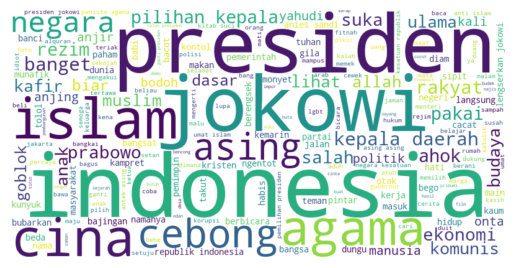

In [78]:
# Importing wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

text = ' '.join(df['clean_tweet_without_stopwords'].to_list())

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [79]:
wordcloud.to_image().save("wordcloud.png")

In [80]:
# determine the word from df['tweet_without_stopwords'] that occurs frequently
import nltk
nltk.download('punkt')
text = ' '.join(df['clean_tweet_without_stopwords'].to_list())
freq_kata = nltk.FreqDist(nltk.word_tokenize(text))
print(freq_kata.most_common(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nigon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('presiden', 1065), ('indonesia', 1022), ('jokowi', 955), ('islam', 793), ('agama', 740), ('asing', 642), ('cina', 593), ('cebong', 528), ('negara', 503), ('rakyat', 461)]


### ***Pie Chart***

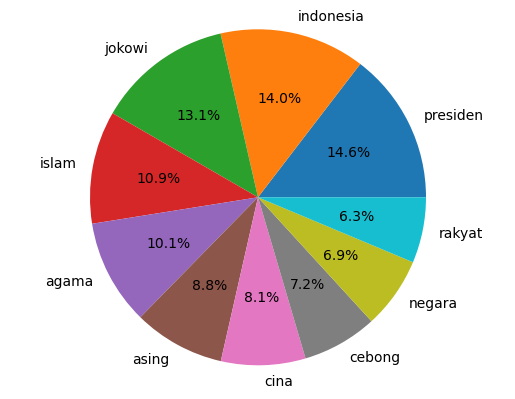

In [81]:
import matplotlib.pyplot as plt

# Return 10 most common words
top_10 = freq_kata.most_common(10)

# Return labels and sum of the top 10 words
labels = [x[0] for x in top_10]
sizes = [x[1] for x in top_10]

# buat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### ***Histogram***

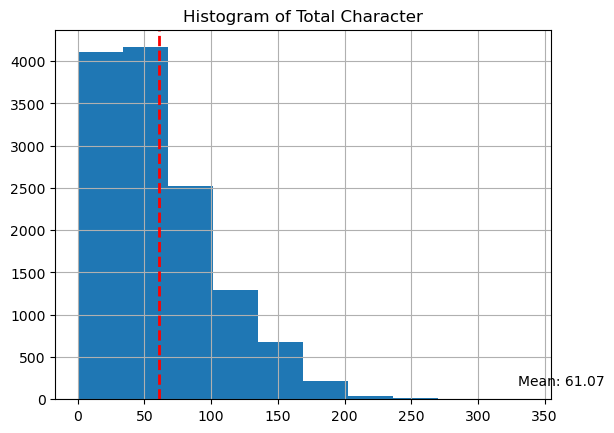

In [82]:
df.total_char_wo_stopwords.hist()
plt.title("Histogram of Total Character")
plt.axvline(mean_total_char, color='r', linestyle='dashed', linewidth=2)
plt.text(x = df.total_char_wo_stopwords.max()-8, y = df.total_char_wo_stopwords.max()*0.5, s = 'Mean: {:.2f}'.format(mean_total_char), size = 10)
plt.show()

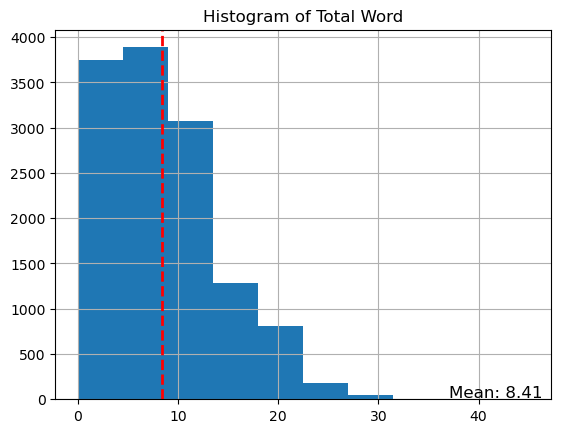

In [83]:
df.total_word_wo_stopwords.hist()
plt.title("Histogram of Total Word")
plt.axvline(mean_total_word, color='r', linestyle='dashed', linewidth=2)
plt.text(x = df.total_word_wo_stopwords.max()-8, y = df.total_word_wo_stopwords.max()*0.5, s = 'Mean: {:.2f}'.format(mean_total_word), size = 12)
plt.show()

### ***Bar Chart***

<Figure size 1000x800 with 0 Axes>

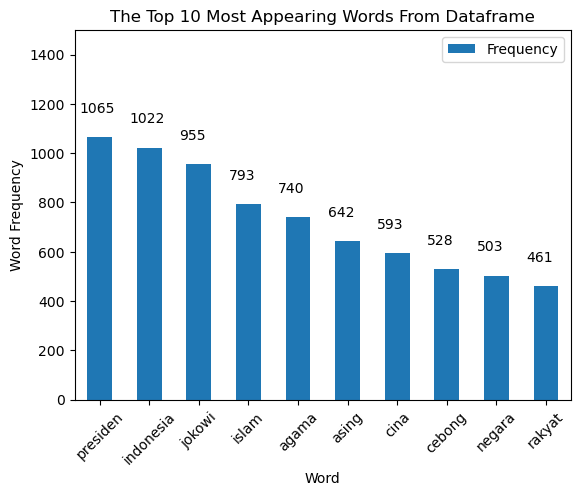

In [84]:
df_freq = pd.DataFrame(freq_kata.most_common(10), columns = ['Word', 'Frequency'])


fig = plt.figure(figsize=(10,8))
df_freq.plot.bar(x='Word', y='Frequency')
plt.xlabel('Word')
plt.ylabel('Word Frequency')
plt.xticks(rotation=45)
plt.title('The Top 10 Most Appearing Words From Dataframe')
plt.ylim(0, 1500)
for i in range(len(df_freq)):
    plt.text(x = i-0.4, y = df_freq.loc[i,'Frequency']+100, s = df_freq.loc[i,'Frequency'], size = 10)
plt.savefig("word_distribution.png", bbox_inches = 'tight', dpi=300)
plt.show()

### Return the values of "kata alay" in df['clean_tweet_without_stopwords'] based on dataframe df_newkamusalay['anakjakartaasikasik']?

In [85]:
clean_tweet_words = set(df['clean_tweet_without_stopwords'].str.split().explode())
kamus_words = set(df_newkamusalay['anakjakartaasikasik'])

matching_words = clean_tweet_words.intersection(kamus_words)

print('Number of Alay Words:', len(matching_words))

Number of Alay Words: 133


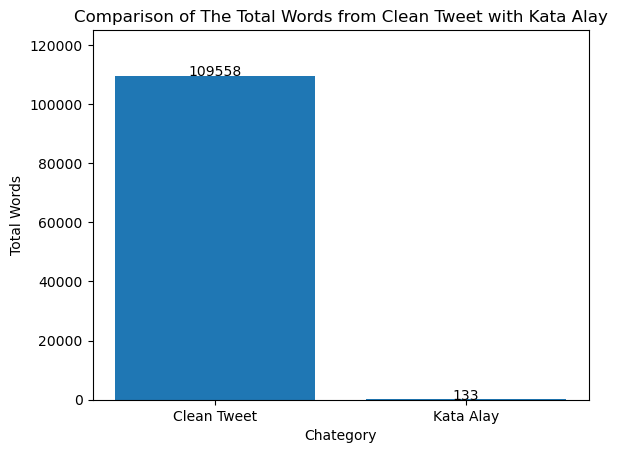

In [87]:
total_word_wo_stopwords = df['total_word_wo_stopwords'].sum()
fig, ax = plt.subplots()

x = ['Clean Tweet', 'Kata Alay']
y = [total_word_wo_stopwords-len(matching_words), len(matching_words)]

ax.bar(x,y)
plt.xlabel('Chategory')
plt.ylabel('Total Words')
plt.ylim(0, 125000)
plt.xticks(rotation=0)
plt.title("Comparison of The Total Words from Clean Tweet with Kata Alay")
for i in range(len(y)):
    ax.annotate(str(y[i]), (x[i], y[i]), ha='center')
plt.savefig("alay_words.png", bbox_inches = 'tight', dpi=300)
plt.show()

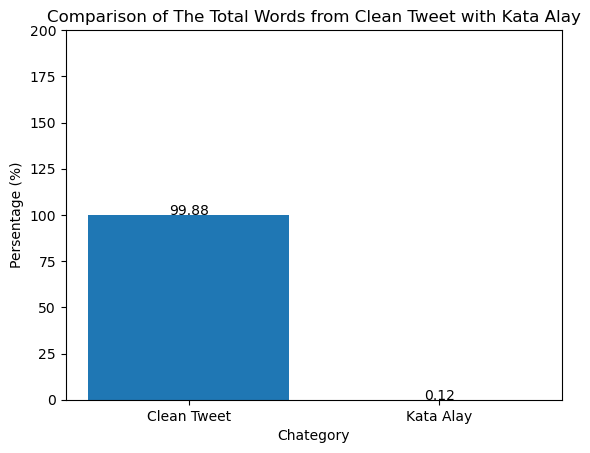

In [88]:
total_word_wo_stopwords = round(((df['total_word_wo_stopwords'].sum() - len(matching_words)) / df['total_word_wo_stopwords'].sum()) * 100,2)
alay_words = round((len(matching_words) / df['total_word_wo_stopwords'].sum()) * 100, 2)
fig, ax = plt.subplots()

x = ['Clean Tweet', 'Kata Alay']
y = [total_word_wo_stopwords, alay_words]

ax.bar(x,y)
plt.xlabel('Chategory')
plt.ylabel('Persentage (%)')
plt.ylim(0, 200)
plt.xticks(rotation=0)
plt.title("Comparison of The Total Words from Clean Tweet with Kata Alay")
for i in range(len(y)):
    ax.annotate(str(y[i]), (x[i], y[i]), ha='center')
plt.savefig("alay_words_percentage.png", bbox_inches = 'tight', dpi=300)
plt.show()

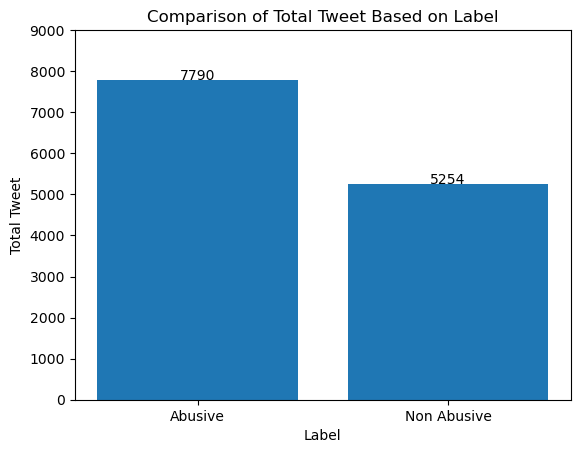

In [89]:
abusive = (df['label'] == 'Abusive').sum()
non_abusive = (df['label'] == 'Non Abusive').sum()

fig, ax = plt.subplots()

x = ['Abusive', 'Non Abusive']
y = [abusive, non_abusive]

ax.bar(x,y)
plt.xlabel('Label')
plt.ylabel('Total Tweet')
plt.ylim(0, 9000)
plt.xticks(rotation=0)
plt.title("Comparison of Total Tweet Based on Label")
for i in range(len(y)):
    ax.annotate(str(y[i]), (x[i], y[i]), ha='center')
plt.savefig("Labels_total_tweet.png", bbox_inches = 'tight', dpi=300)
plt.show()

## **Bivariate Analysis**

In [90]:
df.corr()

,total_char_wo_stopwords,total_word_wo_stopwords,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
total_char_wo_stopwords,1.000000,0.983682,-0.113941,-0.256222,-0.138175,0.014364,0.043756,-0.013481,-0.050206,-0.026946,-0.107094,-0.141240,0.023421,-0.013274
total_word_wo_stopwords,0.983682,1.000000,-0.104272,-0.220951,-0.127378,0.014295,0.051362,-0.011553,-0.038199,-0.012747,-0.107707,-0.127714,0.026088,-0.024141
HS,-0.113941,-0.104272,1.000000,0.365292,0.712754,0.493752,0.296328,0.248039,0.185798,0.180403,0.735728,0.686258,0.451792,0.226287
Abusive,-0.256222,-0.220951,0.365292,1.000000,0.286353,0.148142,0.069610,-0.028722,0.196547,0.187413,0.261476,0.310169,0.188095,-0.098015
HS_Individual,-0.138175,-0.127378,0.712754,0.286353,1.000000,-0.258028,0.033899,-0.000672,0.214011,0.183402,0.636195,0.962826,-0.236100,0.058995
HS_Group,0.014364,0.014295,0.493752,0.148142,-0.258028,1.000000,0.366139,0.342486,-0.009406,0.021111,0.224657,-0.248436,0.915018,0.238550
HS_Religion,0.043756,0.051362,0.296328,0.069610,0.033899,0.366139,1.000000,0.094862,-0.003061,0.024751,-0.159848,0.033490,0.345290,0.083432
HS_Race,-0.013481,-0.011553,0.248039,-0.028722,-0.000672,0.342486,0.094862,1.000000,-0.028927,-0.020306,-0.133800,-0.007345,0.238469,0.243672
HS_Physical,-0.050206,-0.038199,0.185798,0.196547,0.214011,-0.009406,-0.003061,-0.028927,1.000000,0.054019,-0.100225,0.220971,0.000123,-0.025535
HS_Gender,-0.026946,-0.012747,0.180403,0.187413,0.183402,0.021111,0.024751,-0.020306,0.054019,1.000000,-0.097315,0.190753,0.027826,-0.019047


C:\Users\nigon\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


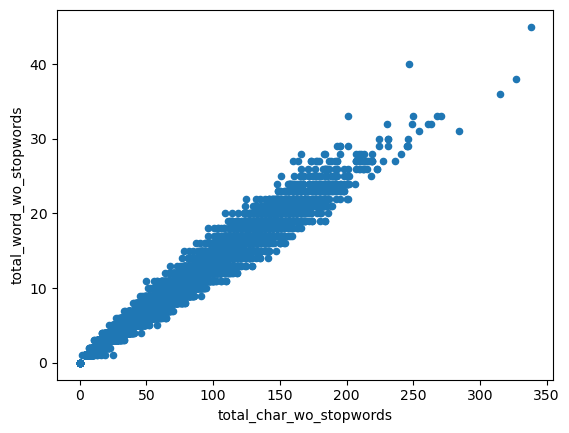

In [91]:
df.plot(x="total_char_wo_stopwords", y="total_word_wo_stopwords", kind='scatter')
plt.savefig("scatter_plot.png", bbox_inches = 'tight', dpi=300)

From df.corr() and scatter plot, we know that between total_char_wo_stopwords and total_word_wo_stopwords are have positive correlation, because the value near 1

### ***Heatmap***

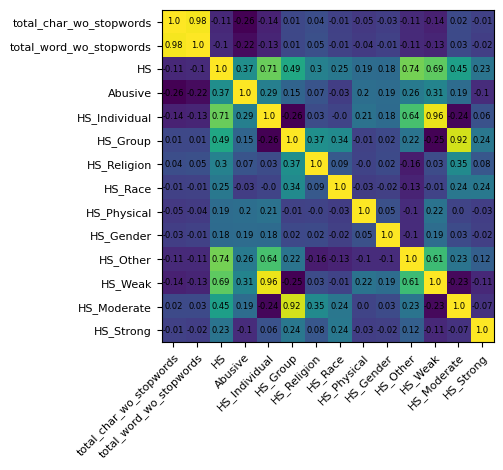

In [92]:
corr = df.corr()
fig, ax = plt.subplots()

im = ax.imshow(corr.values)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, fontsize=8)
ax.set_yticklabels(corr.columns, fontsize=8)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2), ha="center", va="center", color="black", fontsize=6) # decrease font size of text annotations
plt.tight_layout() # adjust subplots to fit the figure size
plt.savefig("scatter_plot.png", bbox_inches = 'tight', dpi=300)
plt.show()

### ***Heatmap***

In [93]:
# Looking correlation of features in a Dataset (df)
import numpy as np

df.corr()

,total_char_wo_stopwords,total_word_wo_stopwords,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
total_char_wo_stopwords,1.000000,0.983682,-0.113941,-0.256222,-0.138175,0.014364,0.043756,-0.013481,-0.050206,-0.026946,-0.107094,-0.141240,0.023421,-0.013274
total_word_wo_stopwords,0.983682,1.000000,-0.104272,-0.220951,-0.127378,0.014295,0.051362,-0.011553,-0.038199,-0.012747,-0.107707,-0.127714,0.026088,-0.024141
HS,-0.113941,-0.104272,1.000000,0.365292,0.712754,0.493752,0.296328,0.248039,0.185798,0.180403,0.735728,0.686258,0.451792,0.226287
Abusive,-0.256222,-0.220951,0.365292,1.000000,0.286353,0.148142,0.069610,-0.028722,0.196547,0.187413,0.261476,0.310169,0.188095,-0.098015
HS_Individual,-0.138175,-0.127378,0.712754,0.286353,1.000000,-0.258028,0.033899,-0.000672,0.214011,0.183402,0.636195,0.962826,-0.236100,0.058995
HS_Group,0.014364,0.014295,0.493752,0.148142,-0.258028,1.000000,0.366139,0.342486,-0.009406,0.021111,0.224657,-0.248436,0.915018,0.238550
HS_Religion,0.043756,0.051362,0.296328,0.069610,0.033899,0.366139,1.000000,0.094862,-0.003061,0.024751,-0.159848,0.033490,0.345290,0.083432
HS_Race,-0.013481,-0.011553,0.248039,-0.028722,-0.000672,0.342486,0.094862,1.000000,-0.028927,-0.020306,-0.133800,-0.007345,0.238469,0.243672
HS_Physical,-0.050206,-0.038199,0.185798,0.196547,0.214011,-0.009406,-0.003061,-0.028927,1.000000,0.054019,-0.100225,0.220971,0.000123,-0.025535
HS_Gender,-0.026946,-0.012747,0.180403,0.187413,0.183402,0.021111,0.024751,-0.020306,0.054019,1.000000,-0.097315,0.190753,0.027826,-0.019047


In [91]:
df

,Tweet,clean_tweet,tweet_tokenized,clean_tweet_without_stopwords,total_char_wo_stopwords,total_word_wo_stopwords,label,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',di saat semua cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,"[di, saat, semua, cowok, berusaha, melacak, perhatian, lantas, remehkan, perhatian, kasih, khusus, basic, cowok, bego]",cowok berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic cowok bego,88,12,Abusive,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',siapa yang telat memberi edan sarap bergaul dengan cigax jifla calis sama siapa licew juga,"[siapa, yang, telat, memberi, edan, sarap, bergaul, dengan, cigax, jifla, calis, sama, siapa, licew, juga]",telat edan sarap bergaul cigax jifla calis licew,48,8,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",kadang berpikir kenapa tetap percaya pada tuhan padahal selalu jatuh berkali kali kadang merasa tuhan meninggalkan sendirian ketika tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika anak,"[kadang, berpikir, kenapa, tetap, percaya, pada, tuhan, padahal, selalu, jatuh, berkali, kali, kadang, merasa, tuhan, meninggalkan, sendirian, ketika, tuaku, berencana, berpisah, ketika, kakakku, lebih, memilih, jadi, kristen, ketika, anak]",kadang berpikir percaya tuhan jatuh berkali kali kadang tuhan meninggalkan tuaku berencana berpisah kakakku memilih kristen anak,128,17,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',matamu sipit tapi dilihat dari mana,"[matamu, sipit, tapi, dilihat, dari, mana]",matamu sipit,12,2,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi haha,"[kaum, cebong, kafir, sudah, kelihatan, dongoknya, dari, awal, tambah, dungu, lagi, haha]",kaum cebong kafir dongoknya dungu,33,5,Abusive,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',jangan asal berbicara ndasmu congor sekate anjing,"[jangan, asal, berbicara, ndasmu, congor, sekate, anjing]",berbicara ndasmu congor sekate anjing,37,5,Abusive,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",kasur enak kunyuk,17,3,Abusive,0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',hati hati bisu bosan duh,"[hati, hati, bisu, bosan, duh]",hati hati bisu bosan duh,24,5,Abusive,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',yang real mudah terdeteksi yang terkubur suatu saat lebih dahsyat ledakannya itulah sebut revolusi jiwa,"[yang, real, mudah, terdeteksi, yang, terkubur, suatu, saat, lebih, dahsyat, ledakannya, itulah, sebut, revolusi, jiwa]",real mudah terdeteksi terkubur dahsyat ledakannya revolusi jiwa,63,8,Non Abusive,0,0,0,0,0,0,0,0,0,0,0,0


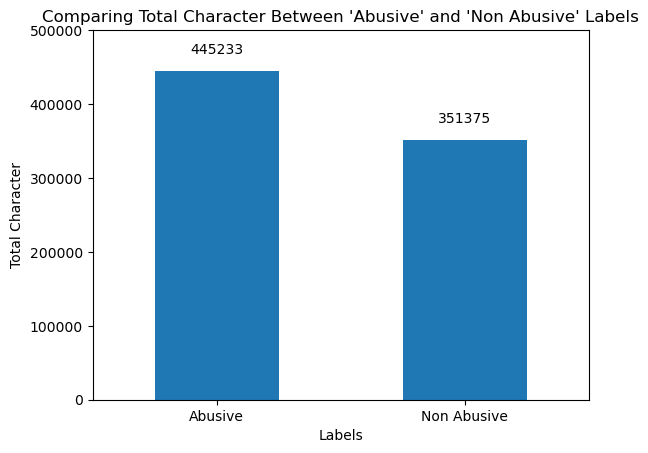

In [94]:
df.groupby('label').total_char_wo_stopwords.sum().plot(kind='bar')
plt.title("Comparing Total Character Between 'Abusive' and 'Non Abusive' Labels")
plt.xlabel("Labels")
plt.xticks(rotation=0)
plt.ylabel("Total Character")
plt.ylim(0,500000)
for i, v in enumerate(df.groupby('label').total_char_wo_stopwords.sum().values):
    plt.annotate(str(v), xy=(i, v), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')
plt.savefig("total_char_abusive.png", bbox_inches = 'tight', dpi=300)
plt.show()

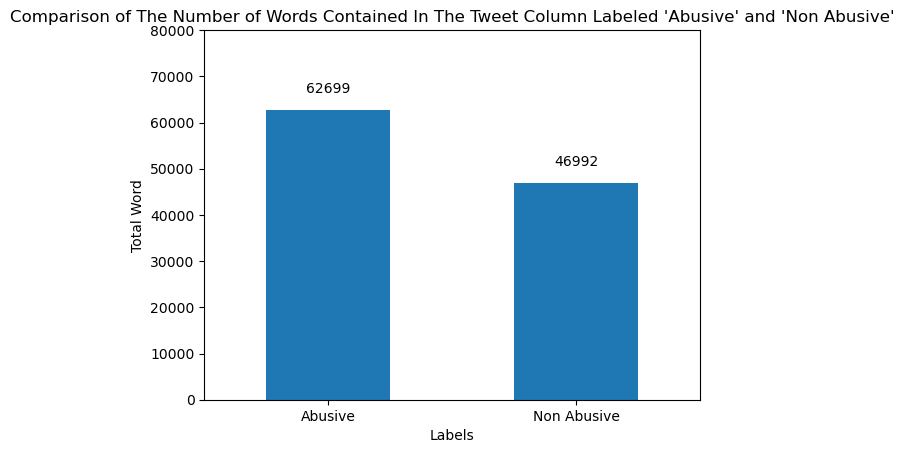

In [95]:
df.groupby('label').total_word_wo_stopwords.sum().plot(kind='bar')
plt.title("Comparison of The Number of Words Contained In The Tweet Column Labeled 'Abusive' and 'Non Abusive'")
plt.xlabel("Labels")
plt.xticks(rotation=0)
plt.ylabel("Total Word")
plt.ylim(0,80000)
for i, v in enumerate(df.groupby('label').total_word_wo_stopwords.sum().values):
    plt.annotate(str(v), xy=(i, v), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')
plt.savefig("total_word_abusive.png", bbox_inches = 'tight', dpi=300)
plt.show()